In [1]:
import numpy as np
import matplotlib.pyplot as plt

# supress unnecessary warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\tensorflow\

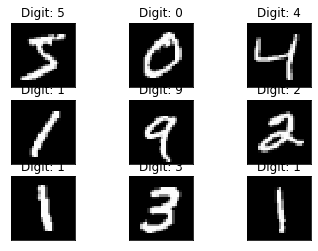

In [2]:
##
## MINST happens to be preloaded with Keras
##

# load mnist
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# display some digits
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

# image shape
sz = train_images.shape[1]

In [3]:
##
## preprocess training and testing patterns
##
## this is a common first step for training any neural network
##

# check out dimensions and types of mnist data
print('*** Original Training and Testing Patterns ***')
print('Training images shape: ', train_images.shape)
print('Training images type:  ', type(train_images[0][0][0]))
print('Testing images shape:  ', test_images.shape)
print('Testing images type:   ', type(test_images[0][0][0]))
print()

# need to reshape and preprocess the training/testing images
train_images_vec = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
train_images_vec = train_images_vec.astype('float32') / 255
test_images_vec = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
test_images_vec = test_images_vec.astype('float32') / 255

# display new input dimensions/type
print('*** Reformatted Training and Testing Patterns ***')
print('Training images shape: ', train_images_vec.shape)
print('Training images type:  ', type(train_images_vec[0][0]))
print('Testing images shape:  ', test_images_vec.shape)
print('Testing images type:   ', type(test_images_vec[0][0]))

*** Original Training and Testing Patterns ***
Training images shape:  (60000, 28, 28)
Training images type:   <class 'numpy.uint8'>
Testing images shape:   (10000, 28, 28)
Testing images type:    <class 'numpy.uint8'>

*** Reformatted Training and Testing Patterns ***
Training images shape:  (60000, 784)
Training images type:   <class 'numpy.float32'>
Testing images shape:   (10000, 784)
Testing images type:    <class 'numpy.float32'>


In [4]:
##
## MINST labels are numeric - want to reformat as one-hot coded vectors
##

from tensorflow.keras.utils import to_categorical

# also need to categorically encode the labels
print('First 5 training labels as labels:\n', train_labels[:5])

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)
print('First 5 training labels as one-hot encoded vectors:\n', train_labels_onehot[:5])

First 5 training labels as labels:
 [5 0 4 1 9]
First 5 training labels as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## start with a simple one-layer neural network in Keras

In [5]:
#########################################################################################
##
## define and train neural network in Keras
##

# import tools for basic keras networks 
from tensorflow.keras import models
from tensorflow.keras import layers# number of input node (nin = 784)
nin = train_images_vec.shape[1]

# number of output nodes (nout = 10)
nout = train_labels_onehot.shape[1]

# create architecture of simple neural network model
# input layer  : 28*28 = 784 (nin) input nodes
# output layer : 10 (nout) sigmoid output nodes

# Sequential is a basic stack of layers (most basic type of neural network)
# https://keras.io/getting-started/sequential-model-guide/
#
# this initializes a blank Sequential network
network = models.Sequential()

# network.add() adds the first (and only) layer to the network (the output layer)
# 
# layers.Dense() is a densely connect layer
# with nout units
# with a sigmoidal activation function
# that receives input from an input later with a specific shape
# 
network.add(layers.Dense(nout, 
                         activation='sigmoid', 
                         input_shape=(nin,)))

# with multi-layer networks, we will have additional network.add() calls

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# print a model summary
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# print more info about the network

print('*** Basic Network Structure ***')
for layer in network.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
print('*** Detailed Network Layer Information ***')
for layer in network.layers:
    print(layer.get_config())
print()

*** Basic Network Structure ***
layer name : dense | input shape : (?, 784) | output shape : (?, 10)

*** Detailed Network Layer Information ***
{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 10, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}



In [8]:
# compile network
#
# configures the network for training, specifying optimizer and loss function
#
# optimizer='sgd'           : stochastic gradient descent (simplest, not the smartest)
# loss='mean_squared_error' : uses MSE (MSE = 1/N * SSE)
# metrics=['accuracy']      : what is printed when verbose=True
network.compile(optimizer='sgd', 
                loss='mean_squared_error', 
                metrics=['accuracy', 'mse'])

# if leave off metrics, only saves loss and val_loss
# network.compile(optimizer='sgd', 
#                 loss='mean_squared_error')

In [9]:
# note that before training, weights are initialized to small random values
print('W shape : {}'.format(network.layers[0].get_weights()[0].shape))
print('weight (W) initial values:')
print(network.layers[0].get_weights()[0])

W shape : (784, 10)
weight (W) initial values:
[[ 0.0434696  -0.07312791  0.06791828 ...  0.02409373  0.01383343
  -0.01871774]
 [ 0.04646685  0.05897155  0.03518604 ...  0.02873019  0.08681963
  -0.08540788]
 [-0.02982108  0.01450865  0.00567929 ...  0.04022194  0.01765777
  -0.02914935]
 ...
 [-0.07688302 -0.08675285  0.04836226 ...  0.03645513 -0.07965605
   0.00210171]
 [-0.05746371  0.00268188  0.00495815 ... -0.02069464 -0.03127427
   0.08069774]
 [-0.0851071  -0.00478388 -0.00013306 ...  0.0681871  -0.01552822
  -0.01991042]]


In [10]:
# now train the network
#
# training requires training patterns (train_image_vec) and teachers (train_labels_onehot)
#
# sets # training epochs, validation (described later), and batch_size
#
# set verbose=True to see training unfold
history = network.fit(train_images_vec, 
                      train_labels_onehot, 
                      verbose=True, 
                      validation_split=.1, 
                      epochs=20, 
                      batch_size=128)
print('Done training!')

# if run this again, it will do more training on the same network

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 33us/sample - loss: 0.1454 - acc: 0.1524 - mean_squared_error: 0.1454 - val_loss: 0.1056 - val_acc: 0.2392 - val_mean_squared_error: 0.1056
Epoch 2/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.0978 - acc: 0.2861 - mean_squared_error: 0.0978 - val_loss: 0.0917 - val_acc: 0.3507 - val_mean_squared_error: 0.0917
Epoch 3/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.0894 - acc: 0.3834 - mean_squared_error: 0.0894 - val_loss: 0.0862 - val_acc: 0.4305 - val_mean_squared_error: 0.0862
Epoch 4/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.0851 - acc: 0.4449 - mean_squared_error: 0.0851 - val_loss: 0.0824 - val_acc: 0.4782 - val_mean_squared_error: 0.0824
Epoch 5/20
54000/54000 [==============================] - 2s 29us/sample - loss: 0.0818 - acc: 0.4816 - mean_squared_error: 0.0818 - val_loss: 0.07

In [11]:
# history contains the loss (training loss), accuracy, mse, val_loss (validation loss), 
# val_accuracy (validation accuracy), val_mse, as a Python dictionary
print(history.history)

{'loss': [0.14539550761602543, 0.09775129275189506, 0.08939633740760662, 0.08505553519946557, 0.08177220672369004, 0.07892380485269758, 0.07635598980938947, 0.07401582277924926, 0.07186889665656619, 0.06988676391045252, 0.06804851598651321, 0.0663395666413837, 0.06474892563069308, 0.06326795901965213, 0.061889965460256297, 0.06060863778105489, 0.05941713814602958, 0.0583081466599747, 0.05727381309535768, 0.05630702666883115], 'acc': [0.15240741, 0.28607407, 0.3834074, 0.44494444, 0.4815741, 0.5079815, 0.5322037, 0.55366665, 0.5733704, 0.5925926, 0.61016667, 0.6251111, 0.6405926, 0.65275925, 0.6633889, 0.6724815, 0.6814259, 0.689963, 0.6973889, 0.7050185], 'mean_squared_error': [0.14539546, 0.09775129, 0.089396305, 0.08505558, 0.08177222, 0.078923844, 0.076356, 0.07401583, 0.07186888, 0.069886744, 0.06804853, 0.06633957, 0.06474891, 0.063267976, 0.061889958, 0.06060865, 0.05941714, 0.058308147, 0.057273827, 0.056307055], 'val_loss': [0.10562044195334117, 0.09172966508070628, 0.086181664

In [12]:
# access one of the elements of the dictionary by name (in this case training accuracy)
print(history.history['accuracy'])

KeyError: 'accuracy'

In [ ]:
# call network.evaluate() if you have test patterns and test answers and want to know performance
test_loss, test_acc = network.evaluate(test_images_vec, 
                                       test_labels_onehot, 
                                       verbose=False)

print('test_loss (MSE)     : {}'.format(test_loss))
print('test_acc (%Correct) : {}'.format(test_acc))

In [ ]:
# call network.predict() if you have test patterns and want to get predicted outputs
out = network.predict(test_images_vec)

print('dimensions of out : {}'.format(out.shape))

## multi-layer neural network in Keras

In [ ]:
from tensorflow.keras import regularizers

# number of input node (nin = 784)
nin = train_images_vec.shape[1]

# create a multi-layer network with two layers of nhid hidden nodes
nhid = 100

# number of output nodes (nout = 10)
nout = train_labels_onehot.shape[1]

# create architecture of multi-layer neural network model
# input layer  : 28*28 = 784 (nin) input nodes
# hidden layer : 100 hidden nodes
# output layer : 10 (nout) softmax output nodes

# this initializes a blank Sequential network
network2 = models.Sequential()

# add layers to the initialized network
# 
# hidden layer (input->hidden) - using relu because of its nice mathematical properties
network2.add(layers.Dense(nhid, 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activation='relu', 
                          input_shape=(nin,)))

# hidden layer (hidden->hidden) - using relu because of its nice mathematical properties
network2.add(layers.Dense(nhid, 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activation='relu'))

# output layer (hidden->output) - using softmax as per discussion in class
network2.add(layers.Dense(nout, 
                          kernel_regularizer=regularizers.l2(0.01), 
                          activation='softmax'))

# regularizers (L1 or L2) can potentially help with over-fitting

In [ ]:
# print a model summary
print(network2.summary())

# print more info about the network

print('*** Basic Network Structure ***')
for layer in network2.layers:
    print('layer name : {} | input shape : {} | output shape : {}'.format(layer.name, layer.input.shape, layer.output.shape))
print()
print('*** Detailed Network Layer Information ***')
for layer in network2.layers:
    print(layer.get_config())
    print()

In [ ]:
# compile network
#
# using 'adam' optimizer (extension of stochastic gradient descent)
#
# using categorical cross entropy with softmax output activation
network2.compile(optimizer='adam', 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])

In [ ]:
# now train the network
#
# validation is used to adjust optimization
history = network2.fit(train_images_vec, 
                       train_labels_onehot, 
                       verbose=True, 
                       validation_split=.1, 
                       epochs=20, 
                       batch_size=128)
print('Done training!')